## Baseline-решение на основе самого частотного класса

В данном ноутбуке представлено baseline-решение задачи классификации направления изменения будущей ключевой ставки ЦБ РФ. Решение основано на простейшей подстановке самого частого класса в обучающей выборке.

### Загрузка данных

In [7]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join("..")))

import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import utils

import warnings
warnings.filterwarnings('ignore')

RANDOM_STATE = 41825352
DATASET_URL = 'https://storage.yandexcloud.net/cbr-press-release-classifier/cbr-press-releases.csv'

Загрузим датасет пресс-релизов, полученных с сайта ЦБ РФ:

In [8]:
df = pd.read_csv(DATASET_URL, parse_dates=['date'])

Для последнего релиза неизвестна целевая переменная (направление изменения ключевой ставки), поэтому исключим его из датасета и сохраним отдельно:

In [9]:
df.sort_values('date', inplace=True)
cur_pr = df.tail(1)
df = df[:-1]

В качестве целевой переменной используется столбец `target_categorial`. В качестве признаков берем текст пресс-релиза, но в данном виде классификатора признаки реально не используются.

In [10]:
X = df[['release']]
y = df.target_categorial

### Подготовка модели

В качестве модели используется `DummyClassifier` из библиотеки `sklearn` со стратегией "самый часто встречающийся класс". В нашем случае это будет решение о сохранении ключевой ставки:

In [11]:
y.value_counts().sort_values(ascending=False)

target_categorial
 0.0    44
-1.0    30
 1.0    25
Name: count, dtype: int64

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        23
         0.0       0.39      1.00      0.56        27
         1.0       0.00      0.00      0.00        19

    accuracy                           0.39        69
   macro avg       0.13      0.33      0.19        69
weighted avg       0.15      0.39      0.22        69



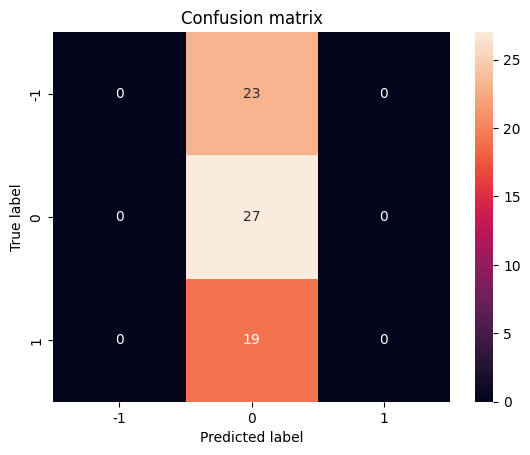

,accuracy,f1,recall,precision,roc_auc_ovr,roc_auc_ovo
dummy,0.391304,0.1875,0.333333,0.130435,0.5,0.5


In [12]:
metric, model = utils.calc_metrics(X.values, y, DummyClassifier, name='dummy', strategy='most_frequent', random_state=RANDOM_STATE)
metric

Как видим, качество модели достаточно низкое.